In [1]:
!pip install tensorflow

In [14]:
import numpy as np
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [7]:
# Transform label indices to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [8]:
# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)
# Normalization of pixel values (to [0-1] range)
x_train = np.reshape(x_train,(50000,3072))
x_test = np.reshape(x_test,(10000,3072))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [9]:
#Multilayer perecptron
from keras.models import Sequential
from keras.layers import Dense, Activation
model_mlp=Sequential()
model_mlp.add(Dense(2056, input_dim=3072))#1st layer
model_mlp.add(Activation('relu'))
model_mlp.add(Dense(1024))#2nd layer
model_mlp.add(Activation('relu'))
model_mlp.add(Dense(512))#3rd layer
model_mlp.add(Activation('relu'))
model_mlp.add(Dense(512))#4th layer
model_mlp.add(Activation('relu'))
model_mlp.add(Dense(10))
model_mlp.add(Activation('softmax'))
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2056)              6318088   
_________________________________________________________________
activation (Activation)      (None, 2056)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2106368   
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               2

In [11]:
model_mlp.compile(optimizer='adam',loss='categorical_crossentropy', metrics='accuracy')
history=model_mlp.fit(x_train,y_train,batch_size=1000,epochs=50, validation_split=0.1)

Epoch 1/50
45/45 [==============================] - 34s 751ms/step - loss: 1.9581 - accuracy: 0.3090 - val_loss: 1.7748 - val_accuracy: 0.3448
Epoch 2/50
45/45 [==============================] - 34s 751ms/step - loss: 1.7202 - accuracy: 0.3792 - val_loss: 1.7331 - val_accuracy: 0.3908
Epoch 3/50
45/45 [==============================] - 34s 749ms/step - loss: 1.6439 - accuracy: 0.4095 - val_loss: 1.6549 - val_accuracy: 0.4100
Epoch 4/50
45/45 [==============================] - 34s 758ms/step - loss: 1.5928 - accuracy: 0.4280 - val_loss: 1.5932 - val_accuracy: 0.4314
Epoch 5/50
45/45 [==============================] - 34s 750ms/step - loss: 1.5340 - accuracy: 0.4513 - val_loss: 1.5438 - val_accuracy: 0.4504
Epoch 6/50
45/45 [==============================] - 34s 752ms/step - loss: 1.4941 - accuracy: 0.4633 - val_loss: 1.5253 - val_accuracy: 0.4538
Epoch 7/50
45/45 [==============================] - 34s 750ms/step - loss: 1.4562 - accuracy: 0.4806 - val_loss: 1.4944 - val_accuracy: 0.4680

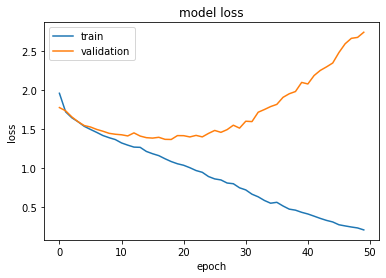

In [15]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
plotLosses(history)

In [17]:
score = model_mlp.evaluate(x_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 2.7252 - accuracy: 0.5151


In [19]:
#SLP
model_slp=Sequential()
model_slp.add(Dense(2056, input_dim=3072))
model_slp.add(Activation('relu'))
model_slp.add(Dense(10, input_shape=(3072,)))
model_slp.add(Activation('softmax'))
model_slp.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2056)              6318088   
_________________________________________________________________
activation_6 (Activation)    (None, 2056)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                20570     
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
Total params: 6,338,658
Trainable params: 6,338,658
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_slp.compile(optimizer='adam',loss='categorical_crossentropy', metrics='accuracy')
slp=model_slp.fit(x_train,y_train, batch_size=1000, epochs=50, validation_split=0.1)

Epoch 1/50
45/45 [==============================] - 21s 465ms/step - loss: 4.2795 - accuracy: 0.1795 - val_loss: 2.0249 - val_accuracy: 0.2728
Epoch 2/50
45/45 [==============================] - 20s 454ms/step - loss: 1.9415 - accuracy: 0.3215 - val_loss: 1.9004 - val_accuracy: 0.3366
Epoch 3/50
45/45 [==============================] - 20s 452ms/step - loss: 1.8485 - accuracy: 0.3582 - val_loss: 1.8251 - val_accuracy: 0.3626
Epoch 4/50
45/45 [==============================] - 20s 453ms/step - loss: 1.7748 - accuracy: 0.3831 - val_loss: 1.7662 - val_accuracy: 0.3816
Epoch 5/50
45/45 [==============================] - 20s 452ms/step - loss: 1.7269 - accuracy: 0.3946 - val_loss: 1.7440 - val_accuracy: 0.4030
Epoch 6/50
45/45 [==============================] - 20s 451ms/step - loss: 1.6819 - accuracy: 0.4133 - val_loss: 1.7038 - val_accuracy: 0.4048
Epoch 7/50
45/45 [==============================] - 20s 452ms/step - loss: 1.6566 - accuracy: 0.4190 - val_loss: 1.6828 - val_accuracy: 0.4084

In [22]:
model_slp.evaluate(x_test, y_test,verbose=0)

[1.3911956548690796, 0.5105999708175659]

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model_mlp.predict(x_test, verbose=2)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)

313/313 - 5s
[[655  40  71  24  35  22  20  16  86  31]
 [ 47 636  22  17  16  22  18  15  67 140]
 [ 92  14 432  69 142  77  79  47  24  24]
 [ 35  23 111 302  68 220 123  44  23  51]
 [ 40  10 161  67 439  59 119  68  25  12]
 [ 22   9  83 194  77 397  96  60  18  44]
 [ 14  13  99  83  96  60 576  17  12  30]
 [ 50  15  75  47 100  79  35 543  10  46]
 [133  58  26  27  33  16  17  12 618  60]
 [ 80 180  30  23  13  16  22  34  49 553]]


In [25]:
y_pred = model_slp.predict(x_test, verbose=2)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)

313/313 - 4s
[[559  19  27  12  27  28  43  23 140 122]
 [ 29 476   4  17  12  15  17  19  79 332]
 [ 69  17 254  91 151 119 147  77  19  56]
 [ 28  13  29 261  58 242 187  48  28 106]
 [ 40   8  73  49 441  66 165  81  24  53]
 [ 19   8  46 149  70 457  97  71  23  60]
 [  8  10  25  48  84  52 699  17  14  43]
 [ 35  12  22  45  78  78  49 561  13 107]
 [ 88  48  10  17  18  28  18   8 643 122]
 [ 18  70   8  26   8  25  15  32  43 755]]
